# How do Credit Scores Effect Annual Car Payments and Annual Car Insurance Payments?

A couple weeks ago, Justin mentioned that he would be interested to see how credit scores effect how much an individual pays for annual car payments and annual car insurance payments. He was also interested in seeing what percentage of their income was being spent on these two expenses, grouped by credit score ranges. So, I went ahead and pulled the reports, made some scatter plots and histograms, and tried to see if we could find anything about the relationship between car payments/car insurance payments and credit scores. 

What you see below is the code that I used to clean up the spreadsheet along with visualizing the graphs. Try not to worry about the code too much, I'll do my best to explain what each part is doing with the text and comments in each code block.  So without further ado, lets dive in. 

In [48]:
#All this code is Python and the code below basically is importing in libraries that I will need to clean up the data 
#and create the visualizations. 

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image

Now before we clean up the data here in python, Ive already filtered and done somethings to the data in salesforce. So lets talk about that. I pulled a "Customers Meetings All Fields Report". This report give us information about each meeting a customer has. I filtered the report so that I only got meetings that had a value filled in for the following fields: "Annual Car Payments", "Annual Car Insurance","Credit Score",and "Total Field Set Income". So if a customer had a meeting where any of the fields mentioned above were blank that specific meeting was removed. I also removed all the Fake customers as well. After I make the report in salesforce, I export it and save the csv file on my desktop. 

In [49]:
#After I save the csv file to my desktop, I then need to import it into this notebook so I can further clean and 
#visualize it. 
car=pd.read_csv('carpayment_data.csv')

In [50]:
#Here are the first 5 rows in our csv! 
car.head()

,Primary Coach: Full Name,Assigned Coach: Full Name,Customer Number,Annual Car Payment,Annual Car Insurance,Credit Score,Total Field Set Income,Meeting Number,Unique Customers,Zip Code,State,Meeting ID Number,Income Baseline Meeting: Meeting ID Number
0,Gloria Diaz,Gloria Diaz,214264,0,0,537,4296,1,1,11212,NaN,M-000202798,M-000202798
1,Fernando Guardado,Fernando Guardado,214227,0,0,594,45520,2,1,76107,TX,M-000202763,M-000202763
2,"Marne Piccolomini, AFC�","Marne Piccolomini, AFC�",213896,3312,1440,625,12000,1,1,44070,NaN,M-000202546,M-000202546
3,Gloria Diaz,Gloria Diaz,213809,0,0,657,23460,1,1,11213,NY,M-000202464,M-000202464
4,"Marne Piccolomini, AFC�","Marne Piccolomini, AFC�",213796,4908,972,538,23880,3,1,44146,NaN,M-000202455,M-000202455


Now each row in my csv is a meeting, meaning that if a customer has multiple meetings they are going to show up more than once. For this analysis I don't want to deal with every single meeting for a customer. I only want the most recent meeting for a customer that has "Annual Car Insurance","Annual Car Payment","Total Field Set Income", and "Credit Score" filled in. The following next lines of code go through and identify a customers most recent meetings and then adds those meetings to a new table.

In [51]:
car['Active Meeting Number']=car.groupby('Customer Number')['Meeting Number'].transform('max')

In [52]:
recent_car=car[car['Active Meeting Number']==car['Meeting Number']]

In [53]:
#here is my new table that has only the most recent meetings for each customer! 
recent_car1=recent_car[(recent_car[('Annual Car Payment')]!=0)|(recent_car['Annual Car Insurance']!=0)]
recent_car1.head()

,Primary Coach: Full Name,Assigned Coach: Full Name,Customer Number,Annual Car Payment,Annual Car Insurance,Credit Score,Total Field Set Income,Meeting Number,Unique Customers,Zip Code,State,Meeting ID Number,Income Baseline Meeting: Meeting ID Number,Active Meeting Number
2,"Marne Piccolomini, AFC�","Marne Piccolomini, AFC�",213896,3312,1440,625,12000,1,1,44070,NaN,M-000202546,M-000202546,1
4,"Marne Piccolomini, AFC�","Marne Piccolomini, AFC�",213796,4908,972,538,23880,3,1,44146,NaN,M-000202455,M-000202455,3
5,Fernando Guardado,Fernando Guardado,213779,4140,960,501,30000,2,1,60074,IL,M-000202444,M-000202444,2
6,Victor Castillo,Victor Castillo,213733,6396,1320,522,62400,1,1,84115,UT,M-000202391,M-000202391,1
11,Sandra Garcia,Sandra Garcia,213483,1800,0,703,14436,3,1,90660,NaN,M-000202783,M-000202170,3


# Credit Score vs Annual Car Payment

Alright! Were doing good. We cleaned up the data so that I am only using the most recent meeting data for each customer. Now lets crunch some numbers to see if there is a relationship between "Credit Score" and "Annual Car Payment". 

In [54]:
#this code is taking only the columns i'll need to do this part of the analysis and adding it to a new table. 
column1=['Customer Number','Annual Car Payment','Credit Score','Total Field Set Income','Meeting Number','State']
car_payment=recent_car1[column1]

In [55]:
#here we are filtering out customers who pay $0 in "Annual Car Payments" and earn $0 in "Total Field Set Income"
car_payment=car_payment[(car_payment['Annual Car Payment']!=0)&(car_payment['Total Field Set Income']!=0)]

In [56]:
#These are some simple functions that go through each row in the data and maps an individuals income and categorizes
#them. So for example if they earned 35K they would be categorized in the "30,000-39,000" category. Same is being
#done with credit score.

def income_mapping(data):
    if 0<=data<20000:
        return "Less than 20,000"
    elif 20000<=data<=29999:
        return "20,000-29,999"
    elif 30000 <= data <=39999:
        return "30,000-39,999"
    elif 40000 <= data <=49999:
        return "40,000-49,999"
    elif 50000 <= data <=59999:
        return "50,000-59,999"
    elif 60000 <= data <=74999:
        return "60,000-74,999"
    elif 75000 <= data <=99999:
        return "75,000-99,999"
    elif data >=100000:
        return "Greater than 100,000"
    
def score_mapping(data):
    if 300<=data<=579:
        return "300-579"
    elif 580<=data<=669:
        return "580-669"
    elif 670 <= data <=739:
        return "760-739"
    elif 740 <= data <=799:
        return "740-799"
    elif 800 <= data <=850:
        return "800-850"

In [57]:
#the output that you see below is the breakdown of credit score ranges for our customers. So you will see that the 
#majority of our customers fall in the "300-579" (Very Poor) credit score range. 
car_payment['ScoreRange']=np.nan
car_payment['ScoreRange']=car_payment['Credit Score'].apply(score_mapping)
car_payment['ScoreRange'].value_counts()

300-579    620
580-669    611
760-739    262
740-799     99
800-850     12
Name: ScoreRange, dtype: int64

In [58]:
#Here we are calculating the percentage of income that a customer spends on their "Annual Car Payment"
car_payment['%income']=(car_payment['Annual Car Payment']/car_payment['Total Field Set Income'])*100

After all that cleaning up and extra calculations we did above, here is what the first five rows in our new table looks like. The graph that we create to see the relationship between Credit Score and Annual Car payment will be using the values from each of these rows. Looks like were in good shape! 

In [59]:
car_payment.head()

,Customer Number,Annual Car Payment,Credit Score,Total Field Set Income,Meeting Number,State,ScoreRange,%income
2,213896,3312,625,12000,1,NaN,580-669,27.600000
4,213796,4908,538,23880,3,NaN,300-579,20.552764
5,213779,4140,501,30000,2,IL,300-579,13.800000
6,213733,6396,522,62400,1,UT,300-579,10.250000
11,213483,1800,703,14436,3,NaN,760-739,12.468828


# Scatterplot: Credit Score vs Annual Car Payment

Alright! Now its time to plot some numbers. So below you will see that we created a scatterplot of an idividuals credit score against their Annual Car Payment. Before we take a look at the graph, lets come up with a hypothesis for what we think the relationship should be. 

Now first we have to define what Car Payment is. I am assuming that car payment can mean two different things. The first being that you leased the car, and you "rent" the car for a specific number of months and each month you have car payments to make. The second being that you have taken out a loan and you are paying back the loan on a monthly basis. 

MY hypothesis is based on that second definition and is that the higher the credit score you have, the better interest rate you get on a loan and the lower you pay on your car payment. Let's see if the numbers stack up with our hypothesis. 

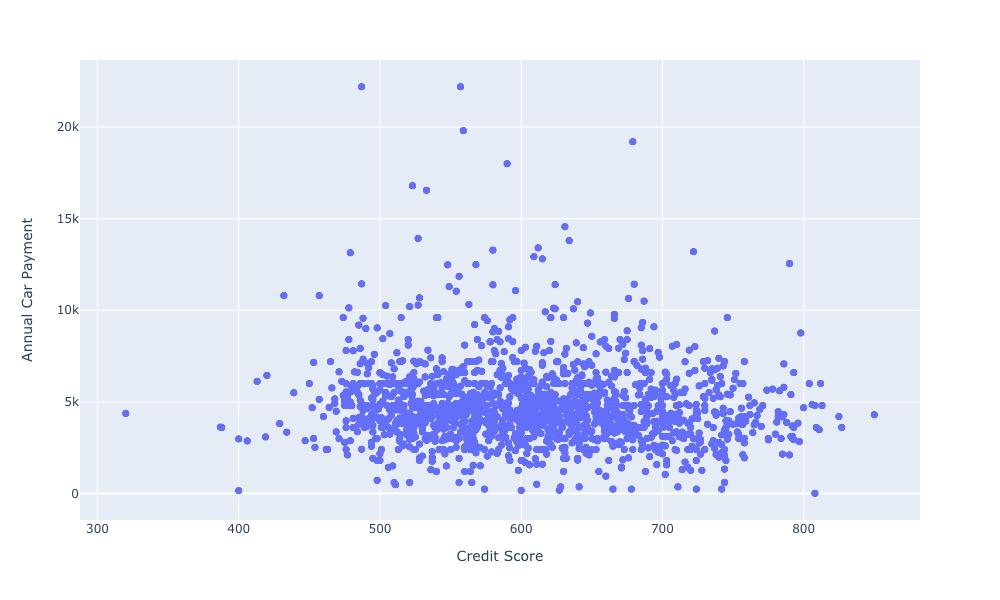

In [60]:
fig = px.scatter(car_payment, x="Credit Score", y="Annual Car Payment", hover_data=['Credit Score','Annual Car Payment'])
img_bytes = fig.to_image(format="png", width=1000, height=600, scale=1)
Image(img_bytes)

Ok, so from a first glance it looks like there really is no CORRELATION between "Annual Credit Score" and "Annual Car Payments". There are customers who have a credit score of 320 and pay roughly the same amount as someone who has a credit score of 720. That leads me to believe that we cant really say anything definitively about whether or not credit scores effect car payments based on this data. 

The only way to tell is to include other variables into this. I am assuming the auto loan lenders do not just look at credit scores to determine your monthly payements.  We might want to compare individual who have the same loan term, or individuals who pay the same interest rate. This is also credit score vs monthly payments. Maybe we might be able to see a stronger correlation between credit scores and Auto loan interest rates! 

For next time something we might wanna do is take a look at Credit Scores vs interset rates rather than monthly car payments first. And if we want to look at Credit Scores vs Car Payments we may want to control for other variables such as interest rates, and loan terms.  

# Percentage of income going towards car payments grouped by credit score categories

My hypothesis is that if an individual has a higher credit score, then the percentage of income that goes towards car payments is going to be less than individuals with a lower credit score. Lets see how that hypothesis plays out. I have a feeling that we may not get some difinitive results based on what I saw above. We may need to control for other variables like interest rates, etc. 

I went back and forth on how to visualize this but ultimately ended up with ever so reliable Bar graph. What I do in the next few lines of code is map an individuals percentage of income towards car payment to a range! I then seperate out each customer into their respective credit score ranges, then create a bar graph for each credit score range. That all probably sounds like giberish so lets actually go through this step by step. 

In [61]:
#In order to map each customers percentage value to a range, I need to know what the min and max values are in my
#dataset. 
print(car_payment['%income'].max())
print(car_payment['%income'].min())

776.4705882352941
0.02744990392533626


In [62]:
#So it looks like 776% of someones income goes towards car payments. That is either an outlier or its just a data entry error.
#It also looks like .02% of someones income goes towards car payments. Again that is either an outlier or most like just a data entry error. 
#So what we are going to do is filter these outliers out of our data set. I only want customers who have a percentage
#value that is in between 1% and 100%.
car_payment2=car_payment[(car_payment['%income']>=1)&(car_payment['%income']<=100)]
print(car_payment2['%income'].max())
print(car_payment2['%income'].min())

94.96124031007753
1.2173348482389224


Ahhhhhhhhh, much better! 

In [63]:
#the following code takes each percent and maps it to a range.
car_payment2['PercentRange']=np.nan

def percent_mapping(data):
    if 0<=data<10:
        return "Less than 10%"
    elif 10<=data<=19:
        return "10%-19%"
    elif 20 <= data <=39:
        return "30%-39%"
    elif 40 <= data <=49:
        return "40%-49%"
    elif 50 <= data <=59:
        return "50%-59%"
    elif 60 <= data <=69:
        return "60%-69%"
    elif 70 <= data <=79:
        return "70-79%"
    elif 80 <= data <=89:
        return "80-89%"
    elif 90 <= data <=100:
        return "90%-100%"
    
car_payment2['PercentRange']=car_payment2['%income'].apply(percent_mapping)

/Users/tfc-vlakshmanan/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/tfc-vlakshmanan/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Let's print out our table to see what it looks like and to see if our mapping worked! 

In [64]:
#BOOM
car_payment2.head()

,Customer Number,Annual Car Payment,Credit Score,Total Field Set Income,Meeting Number,State,ScoreRange,%income,PercentRange
2,213896,3312,625,12000,1,NaN,580-669,27.600000,30%-39%
4,213796,4908,538,23880,3,NaN,300-579,20.552764,30%-39%
5,213779,4140,501,30000,2,IL,300-579,13.800000,10%-19%
6,213733,6396,522,62400,1,UT,300-579,10.250000,10%-19%
11,213483,1800,703,14436,3,NaN,760-739,12.468828,10%-19%


ALRIGHT, so we have mapped our percentage values, filtered out the data entry errors or outliers. Now I am going to take each customer and based on their credit score range, I will split them up into separate tables. 

In [65]:
cs_verypoor=car_payment2[car_payment2['ScoreRange']=='300-579']
cs_fair=car_payment2[car_payment2['ScoreRange']=='580-669']
cs_good=car_payment2[car_payment2['ScoreRange']=='670-739']
cs_verygood=car_payment2[car_payment2['ScoreRange']=='740-799']
cs_exceptional=car_payment2[car_payment2['ScoreRange']=='800-850']

Now we have four different tables that have customers grouped together by credit score range. For each table, I want to see how the break down of percentages. So for individuals who are in the "Very Poor" credit score range table, how many of those customers are using "less than 10% of their income towards car payments, how many are using "30%-39%" of their income, etc. The next section of code, gives us that breakdown for each score range

In [66]:
print(cs_verypoor['PercentRange'].value_counts())
print('----------------------------------------')
print(cs_fair['PercentRange'].value_counts())
print('----------------------------------------')
print(cs_good['PercentRange'].value_counts())
print('----------------------------------------')
print(cs_verygood['PercentRange'].value_counts())
print('----------------------------------------')
print(cs_exceptional['PercentRange'].value_counts())

10%-19%          302
30%-39%          136
Less than 10%    135
40%-49%           10
50%-59%            5
60%-69%            2
90%-100%           1
70-79%             1
80-89%             1
Name: PercentRange, dtype: int64
----------------------------------------
10%-19%          294
Less than 10%    157
30%-39%          115
40%-49%           11
70-79%             3
80-89%             3
50%-59%            3
90%-100%           2
60%-69%            2
Name: PercentRange, dtype: int64
----------------------------------------
Series([], Name: PercentRange, dtype: int64)
----------------------------------------
10%-19%          45
Less than 10%    38
30%-39%          13
Name: PercentRange, dtype: int64
----------------------------------------
10%-19%          6
Less than 10%    4
30%-39%          1
Name: PercentRange, dtype: int64


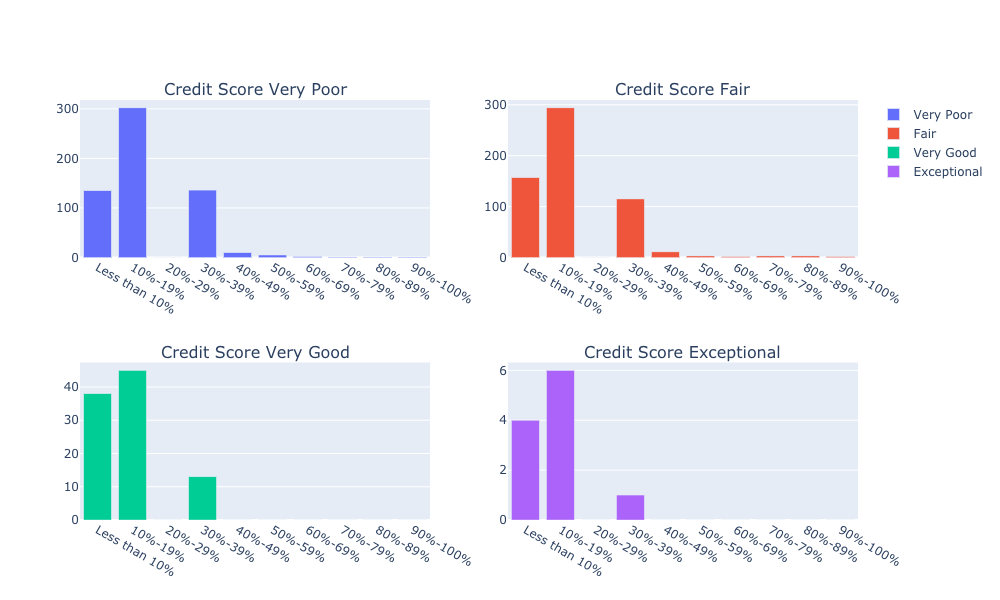

In [67]:
# LETS PLOT THOSE NUMBERS THAT YOU SEE ABOVE AND CREATE SOME BAR GRAPHS!!
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Credit Score Very Poor", "Credit Score Fair", "Credit Score Very Good", "Credit Score Exceptional"))

fig.add_trace(go.Bar(x=['Less than 10%', '10%-19%', '20%-29%','30%-39%','40%-49%','50%-59%',
                        '60%-69%','70%-79%','80%-89%','90%-100%'],
                     y=[135, 302, 0,136,10,5,2,1,1,1],name='Very Poor'),row=1, col=1)

fig.add_trace(go.Bar(x=['Less than 10%', '10%-19%', '20%-29%','30%-39%','40%-49%','50%-59%',
                        '60%-69%','70%-79%','80%-89%','90%-100%'],
                     y=[157,294,0,115,11,3,2,3,3,2],name='Fair'),row=1, col=2)

fig.add_trace(go.Bar(x=['Less than 10%', '10%-19%', '20%-29%','30%-39%','40%-49%','50%-59%',
                        '60%-69%','70%-79%','80%-89%','90%-100%'],
                    y=[38,45,0,13,0,0,0,0,0,0],name='Very Good'),row=2, col=1)

fig.add_trace(go.Bar(x=['Less than 10%', '10%-19%', '20%-29%','30%-39%','40%-49%','50%-59%',
                        '60%-69%','70%-79%','80%-89%','90%-100%'],
                     y=[4, 6,0,1,0,0,0,0,0,0],name='Exceptional'),row=2, col=2)


img_bytes = fig.to_image(format="png", width=1000, height=600, scale=1)
Image(img_bytes)

Here it is! First, it is important to note that the sample sizes for each of the credit score ranges are different. There are much more individuals in the "Very Poor" and "Fair" ranges than there are in the "Very good" and "Exceptional" score ranges. But the distribution of values are all almost the same. And as expected, nothing to surprising based on what we saw above. For each credit score range it looks like the majority of customers are spending "%10-19%" of their income on car payments. Why? I think for all the reasons we stated above. I don't think credit score alone can tell us something. We have to add other variables (i.e interest rates, loan term, etc) to see if there is any meaningful relationship. 

On another note, something that does stand out to me is that we had no customers in the "Good" credit score range (670-739). You were either on one end of the spectrum or the other. I am still trying to pinpoint why that might be. I believe that it has something to do with meeting level data that I used. I only used the most recent meeting where all those fields mentioned above (credit score, income, car payment,car insurance) had a value. Will update if I come up with other reasons as well. 

One last finding that I think is valuable to highlight is that there were only individuals who used more than 40% of their income in the "Very Poor" and "Fair credit score ranges. There were 0 individuals who payed that percentage in the "Very Good" and "Exceptional" score ranges. We can't say anthing definitive because that sample size is just so small. Those individuals just might be outliers but it is noteworthy.

# Annual Car Insurance Payments vs Credit Scores

Above we took a look at how credit scores may effect an individuals car payments. Now we are going to take a look at the other side: How do credit scores effect annual car insurance payments. 

Before we jump in and look at some graphs, let take a look at what goes into determining how much an individual will pay for car insurance. Most Auto Insurance companies use what is called an Auto Insurance Score to determine how much and individual pays for their insurance. What goes into an Auto Insurance score? Many things. Can't really pinpoint the exact factors because each auto insurance company has different scoring models and take into account a variety of factors. But some factors they may take into account include the age of your car, how much you drive, your age, where you live, past accident history and many other things. One factor that also plays a huge role in calculating the insurance score is the credit score! 

Now because we already know that a credit score isn't the only factor that determines how much your insurance rates are, it is highly likely that we may not see any correlation. But it is worth a shot! So lets give it a try. 

In [68]:
#this code block and the ones following are all the same steps we took above but now we are doing it for insurance payments
#instead of car payments. 
column2=['Customer Number','Annual Car Insurance','Credit Score','Total Field Set Income','Meeting Number','State']
car_insurance=recent_car1[column2]
car_insurance=car_insurance[(car_insurance['Annual Car Insurance']!=0)&(car_insurance['Total Field Set Income']!=0)]

In [69]:
car_insurance['ScoreRange']=np.nan
car_insurance['ScoreRange']=car_insurance['Credit Score'].apply(score_mapping)
car_insurance['ScoreRange'].value_counts()

580-669    922
300-579    814
760-739    436
740-799    178
800-850     29
Name: ScoreRange, dtype: int64

In [70]:
car_insurance['%income']=(car_insurance['Annual Car Insurance']/car_insurance['Total Field Set Income'])*100

In [71]:
#lets take a look at a preview of our table to see if we have all the values we need! 
car_insurance.head()

,Customer Number,Annual Car Insurance,Credit Score,Total Field Set Income,Meeting Number,State,ScoreRange,%income
2,213896,1440,625,12000,1,NaN,580-669,12.000000
4,213796,972,538,23880,3,NaN,300-579,4.070352
5,213779,960,501,30000,2,IL,300-579,3.200000
6,213733,1320,522,62400,1,UT,300-579,2.115385
12,213463,1560,517,20228,1,NaN,300-579,7.712082


# Scatterplot of Credit Score vs Annual Insurance Payments 

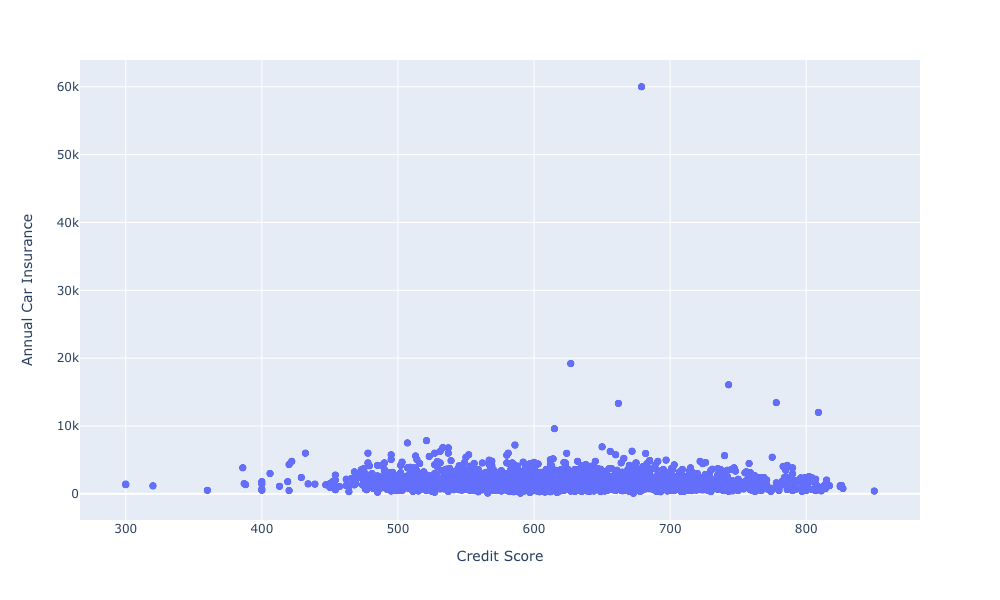

In [72]:
fig = px.scatter(car_insurance, x="Credit Score", y="Annual Car Insurance", hover_data=['Credit Score','Annual Car Insurance'])
img_bytes = fig.to_image(format="png", width=1000, height=600, scale=1)
Image(img_bytes)

This graph really isn't helpful because we have some outliers! Lets remove those individuals and just look at the individuals that pay an Annual Car Insurance rate between $0 & $20K annually. 

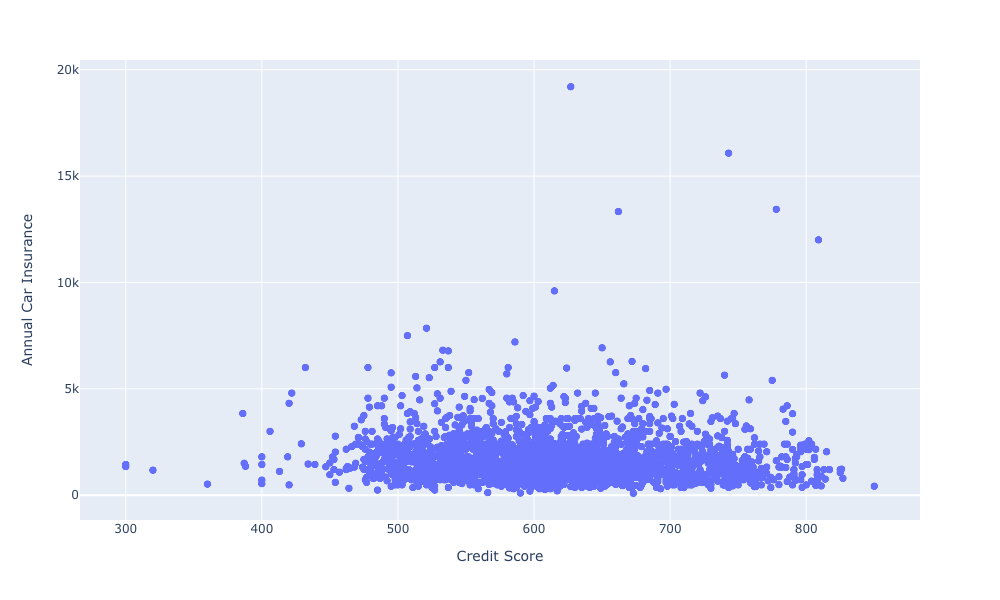

In [73]:
#Here we are removing the outliers and regraphing our values
car_insurance1=car_insurance[(car_insurance['Annual Car Insurance']>0)&(car_insurance['Annual Car Insurance']<20000)]
fig = px.scatter(car_insurance1, x="Credit Score", y="Annual Car Insurance", hover_data=['Credit Score','Annual Car Insurance'])
img_bytes = fig.to_image(format="png", width=1000, height=600, scale=1)
Image(img_bytes)

Ta Daw! As expected, no real correlation. Why? We knew that there were going to be other factors that we would have to take into account. Factors such as Age of car, how much one drives, past accident history. Unfortunately it is data that we do not have as of now. 

If we continue to do this anlysis, I think the next best step would be to split these customers among zip codes and see if we can find anything that way. Lets next take a look at the percentage of income an individual is using to pay for car insurance, grouped by credit score range. Same thing we did for car payments.

Any hypothesis before we start? I have a feeling we are going to see something very similar to what we saw for car payments. Lets take a look. 

In [74]:
#Below is similar code to what we used above. We are going to map the percentage to ranges, the seperate all customers
#into their respective credit score ranges! 

#Who are our outliers?
print(car_insurance1['%income'].max())
print(car_insurance1['%income'].min())

626.6666666666666
0.23123909249563698


In [75]:
#Filter out our outliers
car_insurance1=car_insurance1[(car_insurance1['%income']>=1)&(car_insurance1['%income']<=100)]
print(car_insurance1['%income'].max())
print(car_insurance1['%income'].min())

100.0
1.0


In [76]:
#map percentages to ranges
car_insurance1['PercentRange']=np.nan
car_insurance1['PercentRange']=car_insurance1['%income'].apply(percent_mapping)

In [77]:
#lets take a look at our preview of our table to make sure everything is correct
car_insurance1.head()

,Customer Number,Annual Car Insurance,Credit Score,Total Field Set Income,Meeting Number,State,ScoreRange,%income,PercentRange
2,213896,1440,625,12000,1,NaN,580-669,12.000000,10%-19%
4,213796,972,538,23880,3,NaN,300-579,4.070352,Less than 10%
5,213779,960,501,30000,2,IL,300-579,3.200000,Less than 10%
6,213733,1320,522,62400,1,UT,300-579,2.115385,Less than 10%
12,213463,1560,517,20228,1,NaN,300-579,7.712082,Less than 10%


In [78]:
#Seperating customers into their credit score ranges
cs_verypoor1=car_insurance1[car_insurance1['ScoreRange']=='300-579']
cs_fair1=car_insurance1[car_insurance1['ScoreRange']=='580-669']
cs_good1=car_insurance1[car_insurance1['ScoreRange']=='670-739']
cs_verygood1=car_insurance1[car_insurance1['ScoreRange']=='740-799']
cs_exceptional1=car_insurance1[car_insurance1['ScoreRange']=='800-850']

In [79]:
#getting a breakdown of Percentage Ranges for each credit score category
print(cs_verypoor1['PercentRange'].value_counts())
print('----------------------------------------')
print(cs_fair1['PercentRange'].value_counts())
print('----------------------------------------')
print(cs_good1['PercentRange'].value_counts())
print('----------------------------------------')
print(cs_verygood1['PercentRange'].value_counts())
print('----------------------------------------')
print(cs_exceptional1['PercentRange'].value_counts())

Less than 10%    668
10%-19%          101
30%-39%           20
50%-59%            2
80-89%             1
70-79%             1
40%-49%            1
90%-100%           1
Name: PercentRange, dtype: int64
----------------------------------------
Less than 10%    790
10%-19%           91
30%-39%           21
60%-69%            2
40%-49%            2
Name: PercentRange, dtype: int64
----------------------------------------
Series([], Name: PercentRange, dtype: int64)
----------------------------------------
Less than 10%    155
10%-19%           13
30%-39%            2
50%-59%            1
Name: PercentRange, dtype: int64
----------------------------------------
Less than 10%    25
10%-19%           1
30%-39%           1
Name: PercentRange, dtype: int64


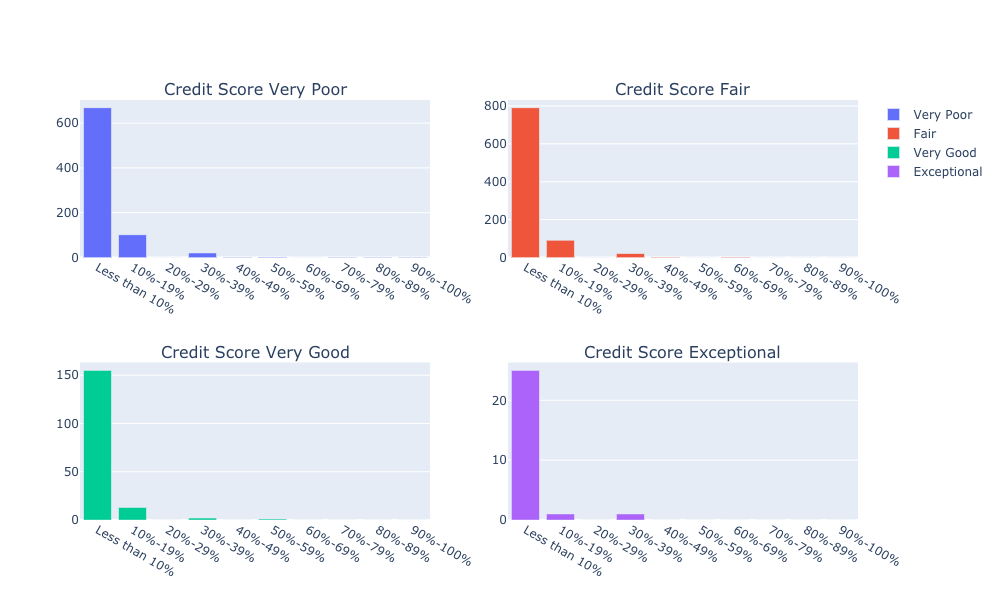

In [80]:
#LETS MAKE SOME BAR GRAPHS USING THE NUMBERS FROM ABOVE
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Credit Score Very Poor", "Credit Score Fair", "Credit Score Very Good", "Credit Score Exceptional"))

fig.add_trace(go.Bar(x=['Less than 10%', '10%-19%', '20%-29%','30%-39%','40%-49%','50%-59%',
                        '60%-69%','70%-79%','80%-89%','90%-100%'],
                     y=[668, 101, 0,20,1,2,0,1,1,1],name='Very Poor'),row=1, col=1)

fig.add_trace(go.Bar(x=['Less than 10%', '10%-19%', '20%-29%','30%-39%','40%-49%','50%-59%',
                        '60%-69%','70%-79%','80%-89%','90%-100%'],
                     y=[790,91,0,21,2,0,2,0,0,0],name='Fair'),row=1, col=2)

fig.add_trace(go.Bar(x=['Less than 10%', '10%-19%', '20%-29%','30%-39%','40%-49%','50%-59%',
                        '60%-69%','70%-79%','80%-89%','90%-100%'],
                    y=[155,13,0,2,0,1,0,0,0,0],name='Very Good'),row=2, col=1)

fig.add_trace(go.Bar(x=['Less than 10%', '10%-19%', '20%-29%','30%-39%','40%-49%','50%-59%',
                        '60%-69%','70%-79%','80%-89%','90%-100%'],
                     y=[25,1,0,1,0,0,0,0,0,0],name='Exceptional'),row=2, col=2)


img_bytes = fig.to_image(format="png", width=1000, height=600, scale=1)
Image(img_bytes)

Alright! We see that although the sample sizes are different for each credit score range, the distribution of the values are all pretty similar. Almost identical in fact, telling us that we can not use credit score alone to determine how much an individual pays for their car insurance. But we knew that already!

# Conclusion

In conclusion we can see that there is no correlation between credit score and car insurance/payments based on our data. We know that because other factors go into the how insurance and car payments are calculated and that credit scores play a minor role. In order to better see that relationship, we control for those factors that we mentioned above.   

One trend that we do see from this sample set, is that the majority of change machine customers fall into the lower ends of the credit score range spectrum. Which makes sense from the analysis that we have done before. 

We also see that based on data from a customers most recent meeting where all fields are filled in, we can see that the majority of individuals pay less than 10% of their income for car insurance payments. Which can tell us a lot of different things. Our customers are good drivers and they do not get into that many accidents, they may be older individuals, maybe they do not drive that much,which makes sense because the majority of our customers live in NYC. Less then 10% may not seem like much but this maybe a conversation that coaches have with customers that do not use their cars and are still paying insurance on them. Maybe this is an area for savings that a customer can look at?  And for car payments the majority of customers are using between 10%-19% of their income on car payments in all credit score ranges. For a customer that makes say 60K a year, 15% of that is 9000 dollars a year on car payments. On a monthly basis that is 750 dollars a month, a pretty significant chunk of money.

This analysis started off by trying to look at how credit scores effect car payments/insurance. We leared that based off the data, there is no correlation between the two because we didn't control for other factors. If we do control for those other factors, I think we can maybe start to see what the relationships might look like. 

I do however do not think that we came away with nothing by doing this analysis. All in all I think its safe to say that, buying a car is a huge decision. One that can have a huge impact on a individuals finances. We saw that from the percentage of income going towards car payments. Cars are a huge investment. These types of analysis are never always that simple. As we saw there are so many other factors we have to consider and it takes time,more data, input from individuals in the field etc. BUTTTTT this is always a good place to start and may lead to further questions, which may lead to a research paper even, or a blog post etc! It all starts here. So lets continue to keep asking QUESTIONS! 